# Broadway Grosses Dataset

> Constructs a **dataset** consisting of box office grosses from all ***closed*** Broadway shows up to this day. Utilizes data from [Broadway World](https://www.broadwayworld.com).

### `SETUP`

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

## 1. Scraping website data 💻

### 1.1. Requesting HTML data

Sends HTTP GET request to page containing data from ***all*** Broadway shows

In [2]:
page_all = requests.get("https://www.broadwayworld.com/grossescumulative.cfm")
page_all

<Response [200]>

Sends HTTP GET request to page containing data from ***current*** Broadway shows

In [3]:
page_curr = requests.get("https://www.broadwayworld.com/grosses.cfm")
page_curr

<Response [200]>

### 1.2 Identifying required HTML tags

Retrieves Table element of ***all*** Broadway shows

In [4]:
soup_all = BeautifulSoup(page_all.content, 'html.parser')
table_all = soup_all.find('table')
table_all

<table cellpadding="4" style="width:100%">
<tbody><tr style="background-color:black">
<td style="vertical-align: middle;"><div style="text-align:center;"><a href="grossescumulative.cfm?sortby=revenue.showname&amp;orderby=desc"><span class="regularw"><strong>Show</strong></span></a></div></td>
<td style="vertical-align: middle;"><div style="text-align:center;"><a href="grossescumulative.cfm?sortby=totaltotalGross&amp;orderby=desc"><span class="regularw"><strong>Gross</strong></span></a></div></td>
<td style="vertical-align: middle;"><div style="text-align:center;"><a href="grossescumulative.cfm?sortby=totaltopticket&amp;orderby=desc"><span class="regularw"><strong>Avg. Tix</strong></span></a></div></td>
<td style="vertical-align: middle;"><div style="text-align:center;"><a href="grossescumulative.cfm?sortby=totalattended&amp;orderby=desc"><span class="regularw"><strong>Seats<br/>Sold</strong></span></a></div></td>
<td style="vertical-align: middle;"><div style="text-align:center;"><a hr

Retrieves list of all Anchor elements containing names of ***current*** Broadway shows

In [5]:
soup_curr = BeautifulSoup(page_curr.content, 'html.parser')
list_curr = soup_curr.find_all('a', class_='title')
list_curr

[<a class="title" href="/grosses/A-STRANGE-LOOP">A STRANGE LOOP</a>,
 <a class="title" href="/grosses/ALADDIN">ALADDIN</a>,
 <a class="title" href="/grosses/AMERICAN-BUFFALO">AMERICAN BUFFALO</a>,
 <a class="title" href="/grosses/BEETLEJUICE">BEETLEJUICE</a>,
 <a class="title" href="/grosses/BIRTHDAY-CANDLES">BIRTHDAY CANDLES</a>,
 <a class="title" href="/grosses/CHICAGO">CHICAGO</a>,
 <a class="title" href="/grosses/COME-FROM-AWAY">COME FROM AWAY</a>,
 <a class="title" href="/grosses/COMPANY">COMPANY</a>,
 <a class="title" href="/grosses/DEAR-EVAN-HANSEN">DEAR EVAN HANSEN</a>,
 <a class="title" href="/grosses/FOR-COLORED-GIRLS-WHO-HAVE-CONSIDERED-SUICIDE-WHEN-THE-RAINBOW-IS-ENUF">FOR COLORED GIRLS WHO HAVE CONSIDERED SUICIDE / WHEN THE RAINBOW IS ENUF</a>,
 <a class="title" href="/grosses/FUNNY-GIRL">FUNNY GIRL</a>,
 <a class="title" href="/grosses/GIRL-FROM-THE-NORTH-COUNTRY">GIRL FROM THE NORTH COUNTRY</a>,
 <a class="title" href="/grosses/HADESTOWN">HADESTOWN</a>,
 <a class="title"

## 2. Creating Dataset 🔠

### 2.1. Getting current shows

Creates list containing current show names.

In [6]:
curr_shows = [show.text.strip() for show in list_curr]
curr_shows

['A STRANGE LOOP',
 'ALADDIN',
 'AMERICAN BUFFALO',
 'BEETLEJUICE',
 'BIRTHDAY CANDLES',
 'CHICAGO',
 'COME FROM AWAY',
 'COMPANY',
 'DEAR EVAN HANSEN',
 'FOR COLORED GIRLS WHO HAVE CONSIDERED SUICIDE / WHEN THE RAINBOW IS ENUF',
 'FUNNY GIRL',
 'GIRL FROM THE NORTH COUNTRY',
 'HADESTOWN',
 'HAMILTON',
 'HANGMEN',
 'HARRY POTTER AND THE CURSED CHILD',
 'HOW I LEARNED TO DRIVE',
 'MACBETH',
 'MJ THE MUSICAL',
 'MOULIN ROUGE! THE MUSICAL',
 'MR. SATURDAY NIGHT',
 'MRS. DOUBTFIRE',
 'PARADISE SQUARE',
 'PLAZA SUITE',
 'POTUS: OR, BEHIND EVERY GREAT DUMBASS ARE SEVEN WOMEN TRYING TO KEEP HIM AL',
 'SIX',
 'TAKE ME OUT',
 'THE BOOK OF MORMON',
 'THE LION KING',
 'THE MINUTES',
 'THE MUSIC MAN',
 'THE PHANTOM OF THE OPERA',
 'THE SKIN OF OUR TEETH',
 'TINA - THE TINA TURNER MUSICAL',
 'WICKED']

### 2.2. Defining Dataframe

- Defines dataframe headers
- Iterates through HTML table containg all shows (starting at the second row to exclude header)
- Gets raw text from each table column and converts numbers to Integer type
- Adds columns to each row (filtering only closed shows)

In [7]:
df = pd.DataFrame(columns=['Show', 'Gross', 'Average ticket price', 'Seats sold', 'Previews', 'Regular shows', 'Total performances'])
for row in table_all.tbody.find_all('tr')[1:]:   
    columns = row.find_all('td')
    if(columns != []):
        show = columns[0].find('strong').text.strip().replace('\n', ' ')
        gross = int(columns[1].text.strip()[1:].replace(',', ''))
        avg_tix = int(columns[2].text.strip()[1:].replace(',', ''))
        seats_sold = int(columns[3].text.strip().replace(',', ''))
        previews = int(columns[4].text.strip().replace(',', ''))
        reg_shows = int(columns[5].text.strip().replace(',', ''))
        total = int(columns[6].text.strip().replace(',', ''))
        if(show not in curr_shows):
            df.loc[len(df.index)] = [show, gross, avg_tix, seats_sold, previews, reg_shows, total]

df.head(n=20)

,Show,Gross,Average ticket price,Seats sold,Previews,Regular shows,Total performances
0,'NIGHT MOTHER,2011480,52,38478,26,65,91
1,110 IN THE SHADE,5169314,51,102030,27,94,121
2,13,4436369,59,72907,22,105,127
3,1776,13667789,40,355683,34,333,367
4,1984,6859821,61,112232,38,125,163
5,33 VARIATIONS,4380302,63,70012,31,85,116
6,42ND STREET,133018977,59,2228839,31,1524,1555
7,42ND STREET - ORIGINAL,61642043,0,2116510,0,1920,1920
8,45 SECONDS FROM BROADWAY,3839871,40,95966,31,73,104
9,700 SUNDAYS,32029177,110,287428,28,209,237


**...**

### 2.3. Exporting dataframe as CSV

In [8]:
df.to_csv('./broadway_grosses.csv')

## 3. Plotting data 📊

### 3.1. Defining scatter plot

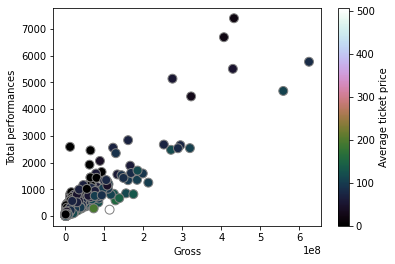

In [9]:
scatter_plot = df.plot.scatter(x='Gross',y='Total performances', s=80, c='Average ticket price', colormap='cubehelix', edgecolors='grey', sharex=False)
plt.show()

### 3.2. Exporting plot

In [10]:
figure = scatter_plot.get_figure()
figure.savefig('scatter_plot.png')